<a href="https://colab.research.google.com/github/9mrcn/Data_Science/blob/master/KLMN_mini__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__PL:__

Kanał KLMN z Los Angeles wyświetla cotygodniowy krajowy serwis informacyjny "US Politics This Week". W reklamie programu występuje burmistrz Los Angeles. Data scientist pracujący w KLMN zauważył, że spośród ludzi którzy obejrzeli reklamę "US Politics This Week", a następnie program jest duża więcej ludzi z Los Angeles niż z innych miast. Przedstawił ten fakt producentom "US Politics This Week"

Producenci "US Politics This Week" wpadli na pomysł, aby stworzyć osobne reklamy dla największych miast z USA wraz z burmistrzami tych miast (czyli reklama w Nowym Jorku będzie z burmistrzem Nowego Jorku). Po stworzeniu reklam były one wyświetlane w odpowiednich miastach wraz ze starą reklamą (z burmistrzem LA) we wszystkich miastach.

Po wykonaniu eksperymentu data scientist zauważył negatywny wynik - mniejsza część ludzi która zobaczyła reklamę ze swoim burmistrzem obejrzała "US Politics This Week" w porównaniu do ludzi którzy zobaczyli reklamę z burmistrzem Los Angeles. Twoim zadaniem jest pomóc w zrozumieniu tego problemu.

Spróbuj odtworzyć negatywny wynik eskperymentu, oraz wytłumacz skąd się on bierze - czy reklamy z lokalnym burmistrzem faktycznie przyciągają mniej ludzi niż z burmistrzem Los Angeles?

Informacje o zbiorze danych:

`test_data.csv`:

- `viewer_id` - id użytkownika
- `date` - data obejrzenia reklamy "US Politics This Week"
- `tv_make` - producent telewizora
- `tv_size` - rozmiar telewizora
- `uhd_capable` - czy telewizor wyświetla obraz w jakość UHD
- `total_time_watched` - suma czasu oglądania telewizji (w godzinach) przez użytkownika w dzień w którym obejrzał reklamę
- `watched` - czy użytkownik obejrzał "US Politics This Week" po obejrzeniu reklamy
- `test` - użytkownicy są podzieleni na dwie grupy - test (1) i control (0), grupa testowa obejrzała reklamy z lokalnym burmistrzem, grupa kontrolna widziała reklamę z burmistrzem LA

`viewer_data.csv`:

- `viewer_id` - id użytkownika
- `gender` - płeć użytkownika
- `age` - wiek użytkownika
- `city` - miasto użytkownika

__EN (Google Translate):__

The Los Angeles-based KLMN channel hosts the weekly national news site "US Politics This Week". The Mayor of Los Angeles stars in an advertisement for the show. A KLMN data scientist noticed that of the people who saw the US Politics This Week ad and then the program, there are many more people from Los Angeles than from other cities. He presented this fact to the producers of "US Politics This Week"

The producers of "US Politics This Week" came up with the idea to create separate advertisements for the largest US cities together with the mayors of these cities (ie the advertisement in New York will be with the mayor of New York). After the ads were created, they were displayed in the respective cities along with the old ad (with the LA mayor) in all the cities.

After running the experiment, the data scientist noticed a negative result - a smaller proportion of people who saw the ad with their mayor watched US Politics This Week compared to people who saw the ad with the mayor of Los Angeles. It is your job to help understand this problem.

Try to recreate the negative result of the experiment, and explain where it comes from - do ads with the local mayor actually attract fewer people than with the mayor of Los Angeles?

Information about the dataset:

`test_data.csv`:

- `viewer_id` - user id
- `date` - date of viewing the ad "US Politics This Week"
- `tv_make` - TV producer
- `tv_size` - TV size
- `uhd_capable` - whether the TV displays the image in UHD quality
- `total_time_watched` - the sum of the user's viewing time (in hours) on the day when the advertisement was watched
- `watched` - whether the user watched "US Politics This Week" after viewing the ad
- `test` - users are divided into two groups - test (1) and control (0), the test group saw advertisements with the local mayor, the control group saw an advertisement with the LA mayor

`viewer_data.csv`:

- `viewer_id` - user id
- `gender` - the gender of the user
- `age` - user's age
- `city` - user's city

# Loading data and needed libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
test_df = pd.read_csv('https://raw.githubusercontent.com/9mrcn/Data_Science/master/data/KLMN_test_data.csv')
viewers_df = pd.read_csv('https://raw.githubusercontent.com/9mrcn/Data_Science/master/data/KLMN_viewer_data.csv')

In [6]:
print('test_df len:', len(test_df['viewer_id']))
print('viewers_df len:', len(viewers_df['viewer_id']))

test_df len: 418026
viewers_df len: 417464


Different number of records in databases. We only want complete records with no missing data. To get this we use inner join.

In [7]:
data_df = test_df.merge(viewers_df, on='viewer_id', indicator=True)

We divide data_df into a exposed group and a control group

In [8]:
control_df = data_df[data_df['test']==0]
exposed_df = data_df[data_df['test']==1]

We want the groups to be independent of each other, so we check whether both data sets have duplicate records.

In [9]:
control_df.merge(exposed_df, on='viewer_id')

,viewer_id,date_x,tv_make_x,tv_size_x,uhd_capable_x,tv_provider_x,total_time_watched_x,watched_x,test_x,gender_x,...,tv_size_y,uhd_capable_y,tv_provider_y,total_time_watched_y,watched_y,test_y,gender_y,age_y,city_y,_merge_y


0 rows - there is no `viewer_id` that would be included in both groups at the same time

In [10]:
exposed_df.groupby('test')['watched'].agg(['mean', 'std'])

,mean,std
test,,
1,0.04578,0.209007


In [11]:
control_df.groupby('test')['watched'].agg(['mean', 'std'])

,mean,std
test,,
0,0.063094,0.243132


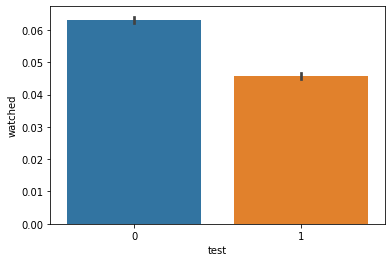

In [12]:
sns.barplot(x=data_df['test'], y=data_df['watched'])

In [13]:
from statsmodels.stats.proportion import proportions_ztest

In [14]:
control_results = control_df['watched']
exposed_results = exposed_df['watched']

n_cont = control_results.count()
n_cont_succ = control_results.sum()
n_exp = exposed_results.count()
n_exp_succ = exposed_results.sum()

$$ H_0: \mu_c = \mu_t $$
$$ H_1: \mu_c < \mu_t $$

In [15]:
proportions_ztest([n_cont_succ, n_exp_succ], [n_cont, n_exp], alternative='smaller')

(24.610014136292214, 1.0)

_p-value_ higher than the assumed significance level alpha = 0.05, it means no grounds for rejecting _H<sub>0</sub>_ stating that the mean in the test and control groups are the same in favor of the alternative hypothesis that the mean in the test group is higher

We completed the first task: "Try to recreate the negative result of the experiment"

How to explain this counter-logical result? Let's check the number of users in the control and test groups, broken down by city:

In [16]:
pd.crosstab(index=data_df['city'], columns=data_df['test'])

test,0,1
city,,
Atlanta,11728,12599
Boston,11758,12660
Chicago,16054,16991
Dallas,12874,13807
Detroit,8739,9192
Houston,11802,12589
Los Angeles,52513,0
Miami,8301,8984
Minneapolis,8203,9093


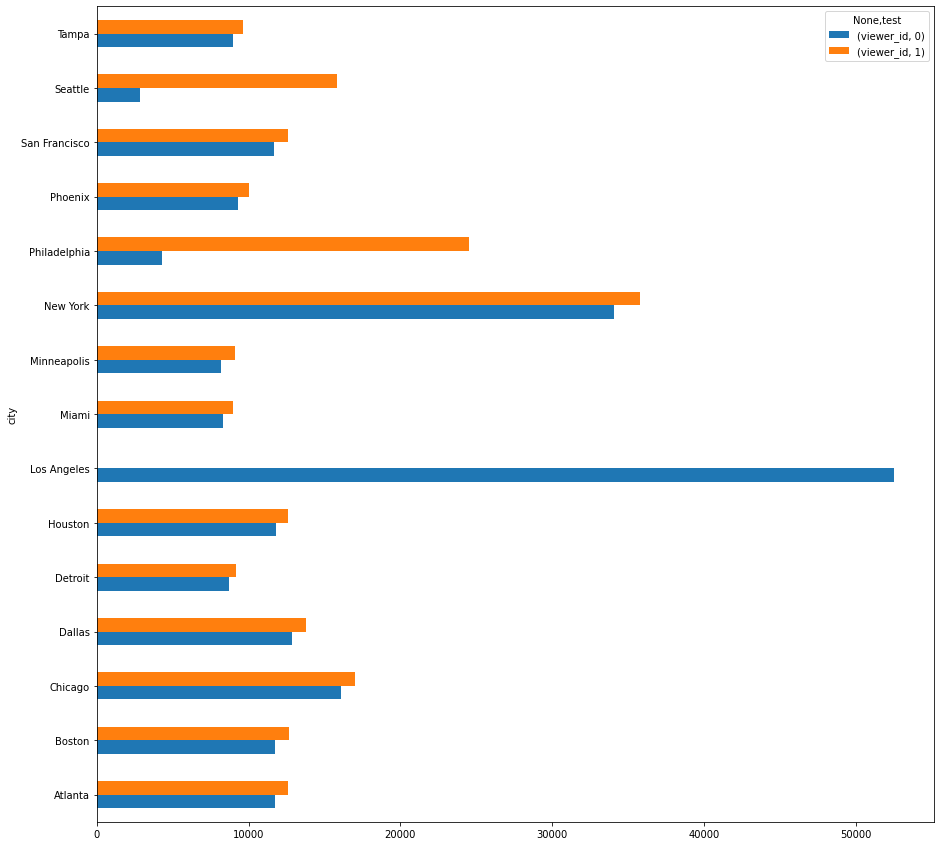

In [17]:
(data_df
     .groupby(['city', 'test'])['viewer_id']
     .count().reset_index()
     .pivot(index = 'city', columns='test')
     .plot(kind='barh', figsize=(15,15))
)

In [18]:
# the proportion of LA observations in the control group
data_df['viewer_id'][data_df['test']==0][data_df['city']=='Los Angeles'].count() / data_df['viewer_id'][data_df['test']==0].count()

0.2463744997489948

Now you can see where the problem occurs - in the control group (0) we have a lot of LA users (almost 25% of the entire control group), who by definition convert very well, thus increasing the average for the entire control group. In order not to artificially raise the results in the control group, it is necessary to get rid of the data about users from LA and run the test again.

In addition, we have two cities that present a significant disproportion between the size of the test group and the control group, these two cities (Seattle and Philadelphia) are also excluded from the data.

In [19]:
control_df = control_df.drop(control_df[control_df['city']=='Los Angeles'].index)
exposed_df = exposed_df.drop(exposed_df[exposed_df['city']=='Seattle'].index | exposed_df[exposed_df['city']=='Philadelphia'].index)
control_df = control_df.drop(control_df[control_df['city']=='Seattle'].index | control_df[control_df['city']=='Philadelphia'].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
control_df['city'].unique()

array(['New York', 'San Francisco', 'Detroit', 'Chicago', 'Minneapolis',
       'Dallas', 'Miami', 'Boston', 'Tampa', 'Houston', 'Phoenix',
       'Atlanta'], dtype=object)

In [22]:
exposed_df['city'].unique()

array(['Boston', 'Minneapolis', 'Atlanta', 'San Francisco', 'Phoenix',
       'New York', 'Tampa', 'Dallas', 'Miami', 'Chicago', 'Houston',
       'Detroit'], dtype=object)

After dropping the observations from LA, Seattle, and Philadelphia, we re-run our test:

$$ H_0: \mu_c = \mu_t $$
$$ H_1: \mu_c < \mu_t $$

In [23]:
control_results = control_df['watched']
exposed_results = exposed_df['watched']

n_cont = control_results.count()
n_cont_succ = control_results.sum()
n_exp = exposed_results.count()
n_exp_succ = exposed_results.sum()

proportions_ztest([n_cont_succ, n_exp_succ], [n_cont, n_exp], alternative='smaller')

(0.14972963461448793, 0.559511036652478)

After removing these 3 cities from the control group, we still have the _p-value_ above the significance level, and this means that we have no grounds to reject _H<sub>0</sub>_ in favor of the alternative one with a higher mean in the test group.

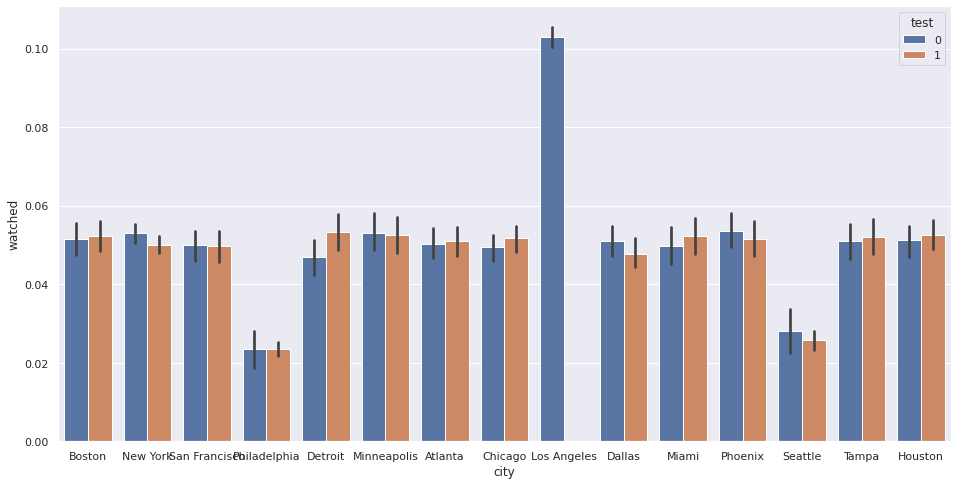

In [24]:
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x=data_df['city'], y=data_df['watched'], hue=data_df['test'])

In [47]:
control_df.groupby('city')['watched'].agg('mean')

city
Atlanta          0.050222
Boston           0.051454
Chicago          0.049458
Dallas           0.050878
Detroit          0.046916
Houston          0.051347
Miami            0.049633
Minneapolis      0.053151
New York         0.053049
Phoenix          0.053665
San Francisco    0.049953
Tampa            0.050925
Name: watched, dtype: float64

In [50]:
control_df.groupby('city')['watched'].agg('mean').to_frame().merge(
    exposed_df.groupby('city')['watched'].agg('mean').to_frame(),
    on='city'
    ).rename(columns={"watched_x": "control watched", "watched_y": "exposed watched"})

,control watched,exposed watched
city,,
Atlanta,0.050222,0.050877
Boston,0.051454,0.052291
Chicago,0.049458,0.051674
Dallas,0.050878,0.047802
Detroit,0.046916,0.053198
Houston,0.051347,0.052586
Miami,0.049633,0.052204
Minneapolis,0.053151,0.052458
New York,0.053049,0.050011


Let's run the test again, this time for each city separately, and answer the question of whether dedicated ads converted better in a given city:

$$ H_0: \mu_c = \mu_t $$
$$ H_1: \mu_c < \mu_t $$


In [64]:
cities = control_df['city'].unique()

for city in cities:

    control_results = control_df['watched'][control_df['city']==city]
    exposed_results = exposed_df['watched'][exposed_df['city']==city]

    n_cont = control_results.count()
    n_cont_succ = control_results.sum()
    n_exp = exposed_results.count()
    n_exp_succ = exposed_results.sum()

    _, p_val = proportions_ztest([n_cont_succ, n_exp_succ], [n_cont, n_exp], alternative='smaller')
    p_val = round(p_val, 4)
    
    if p_val < 0.05:
        print('{}: p-value= {},\n(p-value below the significance level of 0.05 -> we reject H_0, and accept the alternative hypothesis about better conversion in dedicated ads)\n'.format(city, p_val))
    else:
        print('{}: p-value= {},\n(p-value above the significance level, and this means that we have no grounds to reject H_0)\n'.format(city, p_val))


New York: p-value= 0.9653,
(p-value above the significance level, and this means that we have no grounds to reject H_0)

San Francisco: p-value= 0.5436,
(p-value above the significance level, and this means that we have no grounds to reject H_0)

Detroit: p-value= 0.027,
(p-value below the significance level of 0.05 -> we reject H_0, and accept the alternative hypothesis about better conversion in dedicated ads)

Chicago: p-value= 0.1791,
(p-value above the significance level, and this means that we have no grounds to reject H_0)

Minneapolis: p-value= 0.5807,
(p-value above the significance level, and this means that we have no grounds to reject H_0)

Dallas: p-value= 0.8769,
(p-value above the significance level, and this means that we have no grounds to reject H_0)

Miami: p-value= 0.2213,
(p-value above the significance level, and this means that we have no grounds to reject H_0)

Boston: p-value= 0.3842,
(p-value above the significance level, and this means that we have no grounds

Only in Detroid the z-proportion test showed a statistically significant improvement in the converison for dedicated ads. In all other cities, there was no improvement OR it was not statistically significant.

Can we conclude that there has been an improvement in the performance of the ads in Detroit?


In [52]:
from scipy.stats import binom


binom.cdf(1, n=12, p=0.05)
# expecting to get one success in n=12 tries with a success probability of p=0.05, we have approx. 88% chance to succeed

0.881640143028513

With a series of tests (as in the example above), the _p-value_ should be _0.05 / n_, where _n_ is the number of tests performed in the single series
(more at replicabilityindex.com):

In [62]:
print('number of cities:', len(cities))
p_val_level_for_series = round(0.05 / len(cities),4)
print('p-value for series of test:', p_val_for_series)

number of cities: 12
p-value for series of test: 0.004166666666666667


In [63]:
for city in cities:

    control_results = control_df['watched'][control_df['city']==city]
    exposed_results = exposed_df['watched'][exposed_df['city']==city]

    n_cont = control_results.count()
    n_cont_succ = control_results.sum()
    n_exp = exposed_results.count()
    n_exp_succ = exposed_results.sum()

    _, p_val = proportions_ztest([n_cont_succ, n_exp_succ], [n_cont, n_exp], alternative='smaller')
    p_val = round(p_val, 4)
    
    if p_val < p_val_level_for_series:
        print('{}: p-value= {}\n(p-value below the significance level of {} -> we reject H_0, and accept the alternative hypothesis about better conversion in dedicated ads)\n'.format(city, p_val, p_val_level_for_series))
    else:
        print('{}: p-value= {},\n(p-value above the significance level of {} -> we have no grounds to reject H_0)\n'.format(city, p_val, p_val_level_for_series))


New York: p-value= 0.9653,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

San Francisco: p-value= 0.5436,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

Detroit: p-value= 0.027,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

Chicago: p-value= 0.1791,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

Minneapolis: p-value= 0.5807,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

Dallas: p-value= 0.8769,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

Miami: p-value= 0.2213,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

Boston: p-value= 0.3842,
(p-value above the significance level of 0.0042 -> we have no grounds to reject H_0)

Tampa: p-value= 0.3678,
(p-value above the significance level of 0.0042 -> we have no grounds to r